In [1]:
import numpy as np
import matplotlib.pyplot as plt

The optimal price is $84 which yields an expected revenue of $214.96 per flight.


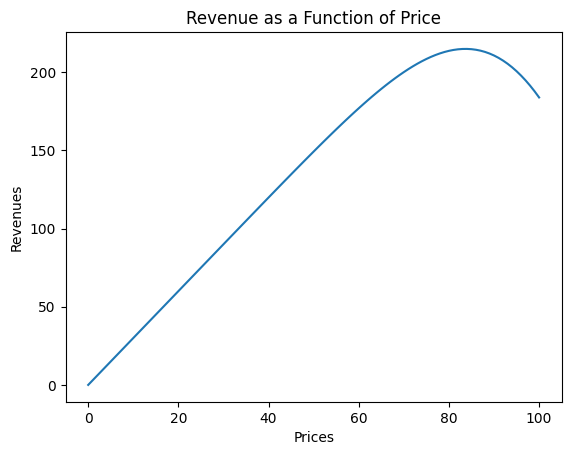

In [24]:
# Data Input
# Global Variables
num_states = 10
states = np.array([[0,0],[1,0],[2,0],[3,0],[0,1],[1,1],[2,1],[0,2],[1,2],[0,3]])    # referenced by [state, group]
ub_gov = 100
ub_private = 150
prices = range(101) # The largest price is up to $100 since government customers will not pay more than that. 
prop_gov = 0.4  # Proportion of government clients
prop_private = 1 - prop_gov # Proportion of private clients
# Variable that changes for sensitity analysis.
n_calls = 10    # Assumption is that the average number of calls to book a flight is 10

def find_best_price(n_calls = 10):
    # Initialize Solution Variables
    transition_matrix = np.zeros((num_states,num_states))   # Initialize the transition matrix
    after_n_calls = np.zeros((num_states,num_states))   # Initialize the transition matrix that will be raised to the power of n (i.e., 10 calls)
    expected_total = 0  # Initialize the expected total revenue
    optimal_price = 0   # Initialize the optimal price for O'Rory to charge per person.

    # Finally, keep a list of revenues so that they can be plotted later with respect to price
    revenues = []

    # Loop through all the prices from 0 to 100 to calculate the expected total revenue for each price
    # and update the solution variables if a higher revenue is found
    for price in prices:
        # Willingness of each client group to pay the specified price
        gov_willingness = 1 - price/ub_gov
        private_willingness =  1 - price/ub_private
        # Probability that a certain group will end up being a paying client after a call.
        prob_gov_pays = prop_gov * gov_willingness
        prob_private_pays = prop_private * private_willingness
        # Probability that neither group will end up being a paying client after a call.
        prob_none = 1 - prob_gov_pays - prob_private_pays
        # Initilize the transition matrix for this specific price.
        transition_matrix_new = np.zeros((num_states,num_states))
        for i in range(num_states):
            for j in range(num_states):
                if i == j and np.sum(states[i]) < 3:
                    transition_matrix_new[i,j] = prob_none  # state doesn't change even though plane isn't full which means that the client didn't accept
                elif i == j and np.sum(states[i]) == 3:
                    transition_matrix_new[i,j] = 1 # the flight is full and cannot accept any more clients
                elif i < j and states[j,0] - states[i,0] == 1 and states[j,1] - states[i,1] == 0:
                    transition_matrix_new[i,j] = prob_gov_pays  # If the government group increases by 1 customer, then the transition probability is the probability that a gov client accepts the price 
                elif i < j and states[j,0] - states[i,0] == 0 and states[j,1] - states[i,1] == 1:
                    transition_matrix_new[i,j] = prob_private_pays  # If the private group increases by 1 customer, then the transition probability is the probabilty that a private customer accepts the price.
                else:
                    transition_matrix_new[i,j] = 0  # all other probabilities are 0
        # Attain the transition matrix that shows the transition probabilities after 10 calls have been made
        after_n_calls_new = np.linalg.matrix_power(transition_matrix_new, n_calls)
        # calculate the expected total revenue from a plane trip given the price being charged and the transition probability matrix taken to the power of 10
        expected_total_new = 0
        # Loop through all the states
        for i in range(num_states):
            # We only need the first row of the after_n_calls_new matrix because that is the row that shows the probabilty of ending up in each
            # state after 10 phone-calls given that you started at state 0 which is 0 customers from each the government and private group.
            
            # Expected revenue of each state is the price multiplied by the probability of ending up in that state multiplied by the total number of customers in that state.
            expected_total_new += price * after_n_calls_new[0,i] * np.sum(states[i])
        revenues.append(expected_total_new)
        # If the current revenue is greater than a previously calculated revenue based off a smaller price, update the solution variables.
        if expected_total_new > expected_total:
            optimal_price = price
            expected_total = expected_total_new
            transition_matrix = transition_matrix_new
            after_n_calls = after_n_calls_new
    return optimal_price, expected_total, transition_matrix, after_n_calls, revenues

# Base Solution
optimal_price, expected_total, transition_matrix, after_n_calls, revenues = find_best_price()
print(f"The optimal price is ${optimal_price} which yields an expected revenue of ${expected_total:.2f} per flight.")

# Plot revenue as a function of price to see a visualization of the solution
plt.plot(prices, revenues, linestyle='-')

# Add labels and a title
plt.xlabel('Prices')
plt.ylabel('Revenues')
plt.title('Revenue as a Function of Price')

# Show the plot
plt.show()

# Sensitivity Analysis

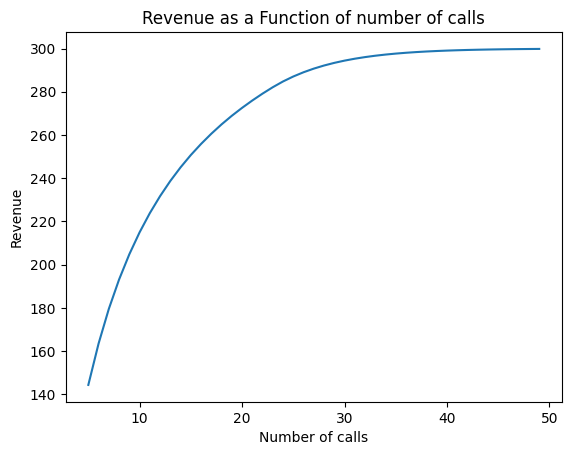

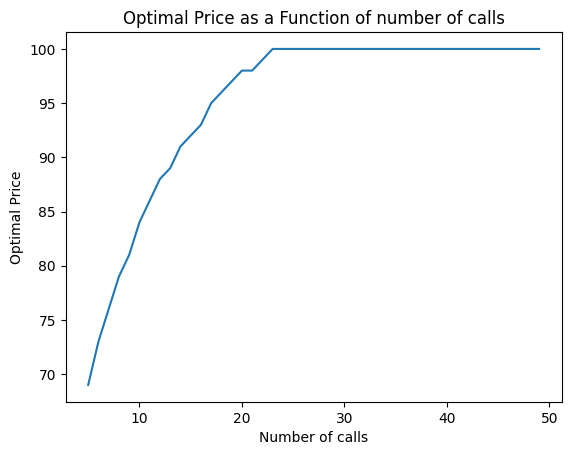

In [26]:
# List of number of calls before a certain flight
n_calls_list = range(5,50)
# Each list value will represent the resulting expected revenue after there being n number of calls.
# The index matches the asociated call number of the same index in n_calls_list
revenue_n_calls = []
price_n_calls = []

for n_calls in n_calls_list:
    optimal_price, expected_total, transition_matrix, after_n_calls, revenue = find_best_price(n_calls)
    revenue_n_calls.append(expected_total)
    price_n_calls.append(optimal_price)
    #print(f"The optimal price is ${optimal_price} which yields a revenue of ${expected_total:.2f} when n_calls is {n_calls}.")

# Plot Revenue as a Function of number of calls
plt.plot(n_calls_list, revenue_n_calls)

# Add labels and a title
plt.xlabel('Number of calls')
plt.ylabel('Revenue')
plt.title('Revenue as a Function of number of calls')
# Show the plot
plt.show()

# Plot price as a function of number of calls
plt.plot(n_calls_list, price_n_calls)

# Add labels and a title
plt.xlabel('Number of calls')
plt.ylabel('Optimal Price')
plt.title('Optimal Price as a Function of number of calls')

# Show the plot
plt.show()